In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = 'all'
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2hvbWUvb3Jlbi93b3JrL25vdGVzL25vdGVzLW5scC9wb3N0cy9jMXcz'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

/tmp/ipykernel_157787/1322090742.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/usr/lib/python3.10/importlib/_bootstrap.py": 1737124534.0, "/usr/lib/python3.10/importlib/_bootstrap_external.py": 1737124534.0, "/usr/lib/python3.10/codecs.py": 1737124534.0, "/usr/lib/python3.10/encodings/aliases.py": 1737124534.0, "/usr/lib/python3.10/encodings/__init__.py": 1737124534.0, "/usr/lib/python3.10/encodings/utf_8.py": 1737124534.0, "/usr/lib/python3.10/abc.py": 1737124534.0, "/usr/lib/python3.10/io.py": 1737124534.0, "/usr/lib/python3.10/stat.py": 1737124534.0, "/usr/lib/python3.10/_collections_abc.py": 1737124534.0, "/usr/lib/python3.10/genericpath.py": 1737124534.0, "/usr/lib/python3.10/posixpath.py": 1737124534.0, "/usr/lib/python3.10/os.py": 1737124534.0, "/usr/lib/python3.10/_sitebuiltins.py": 1737124534.0, "/usr/lib/python3.10/types.py": 1737124534.0, "/usr/lib/python3.10/warnings.py": 1737124534.0, "/usr/lib/python3.10/importlib/__init__.py": 1737124534.0, "/usr/lib/python3.10/importlib/_abc.py": 1737124534.0, "/usr/lib/python3.10/keyword.py": 1737124534.0, "/u

In [2]:
import pandas as pd # Library for Dataframes 
import numpy as np # Library for math functions
import pickle # Python object serialization library. Not secure

word_embeddings = pickle.load( open( "./data/word_embeddings_subset.p", "rb" ) )
len(word_embeddings) # there should be 243 words that will be used in this assignment

243

In [3]:
countryVector = word_embeddings['country'] # Get the vector representation for the word 'country'
print(type(countryVector)) # Print the type of the vector. Note it is a numpy array
print(countryVector) # Print the values of the vector.  

<class 'numpy.ndarray'>
[-0.08007812  0.13378906  0.14355469  0.09472656 -0.04736328 -0.02355957
 -0.00854492 -0.18652344  0.04589844 -0.08154297 -0.03442383 -0.11621094
  0.21777344 -0.10351562 -0.06689453  0.15332031 -0.19335938  0.26367188
 -0.13671875 -0.05566406  0.07470703 -0.00070953  0.09375    -0.14453125
  0.04296875 -0.01916504 -0.22558594 -0.12695312 -0.0168457   0.05224609
  0.0625     -0.1484375  -0.01965332  0.17578125  0.10644531 -0.04760742
 -0.10253906 -0.28515625  0.10351562  0.20800781 -0.07617188 -0.04345703
  0.08642578  0.08740234  0.11767578  0.20996094 -0.07275391  0.1640625
 -0.01135254  0.0025177   0.05810547 -0.03222656  0.06884766  0.046875
  0.10107422  0.02148438 -0.16210938  0.07128906 -0.16210938  0.05981445
  0.05102539 -0.05566406  0.06787109 -0.03759766  0.04345703 -0.03173828
 -0.03417969 -0.01116943  0.06201172 -0.08007812 -0.14941406  0.11914062
  0.02575684  0.00302124  0.04711914 -0.17773438  0.04101562  0.05541992
  0.00598145  0.03027344 -0.07

In [4]:
#Get the vector for a given word:
def vec(w):
    return word_embeddings[w]

Text(0.06396484375, -0.279296875, 'oil')

Text(0.01080322265625, -0.138671875, 'gas')

Text(0.025390625, 0.00160980224609375, 'happy')

Text(-0.044677734375, 0.06689453125, 'sad')

Text(-0.0400390625, 0.18359375, 'city')

Text(-0.1611328125, 0.030029296875, 'town')

Text(-0.2158203125, 0.09033203125, 'village')

Text(0.0947265625, 0.1435546875, 'country')

Text(0.1279296875, 0.2392578125, 'continent')

Text(0.10888671875, -0.22265625, 'petroleum')

Text(0.083984375, 0.1298828125, 'joyful')

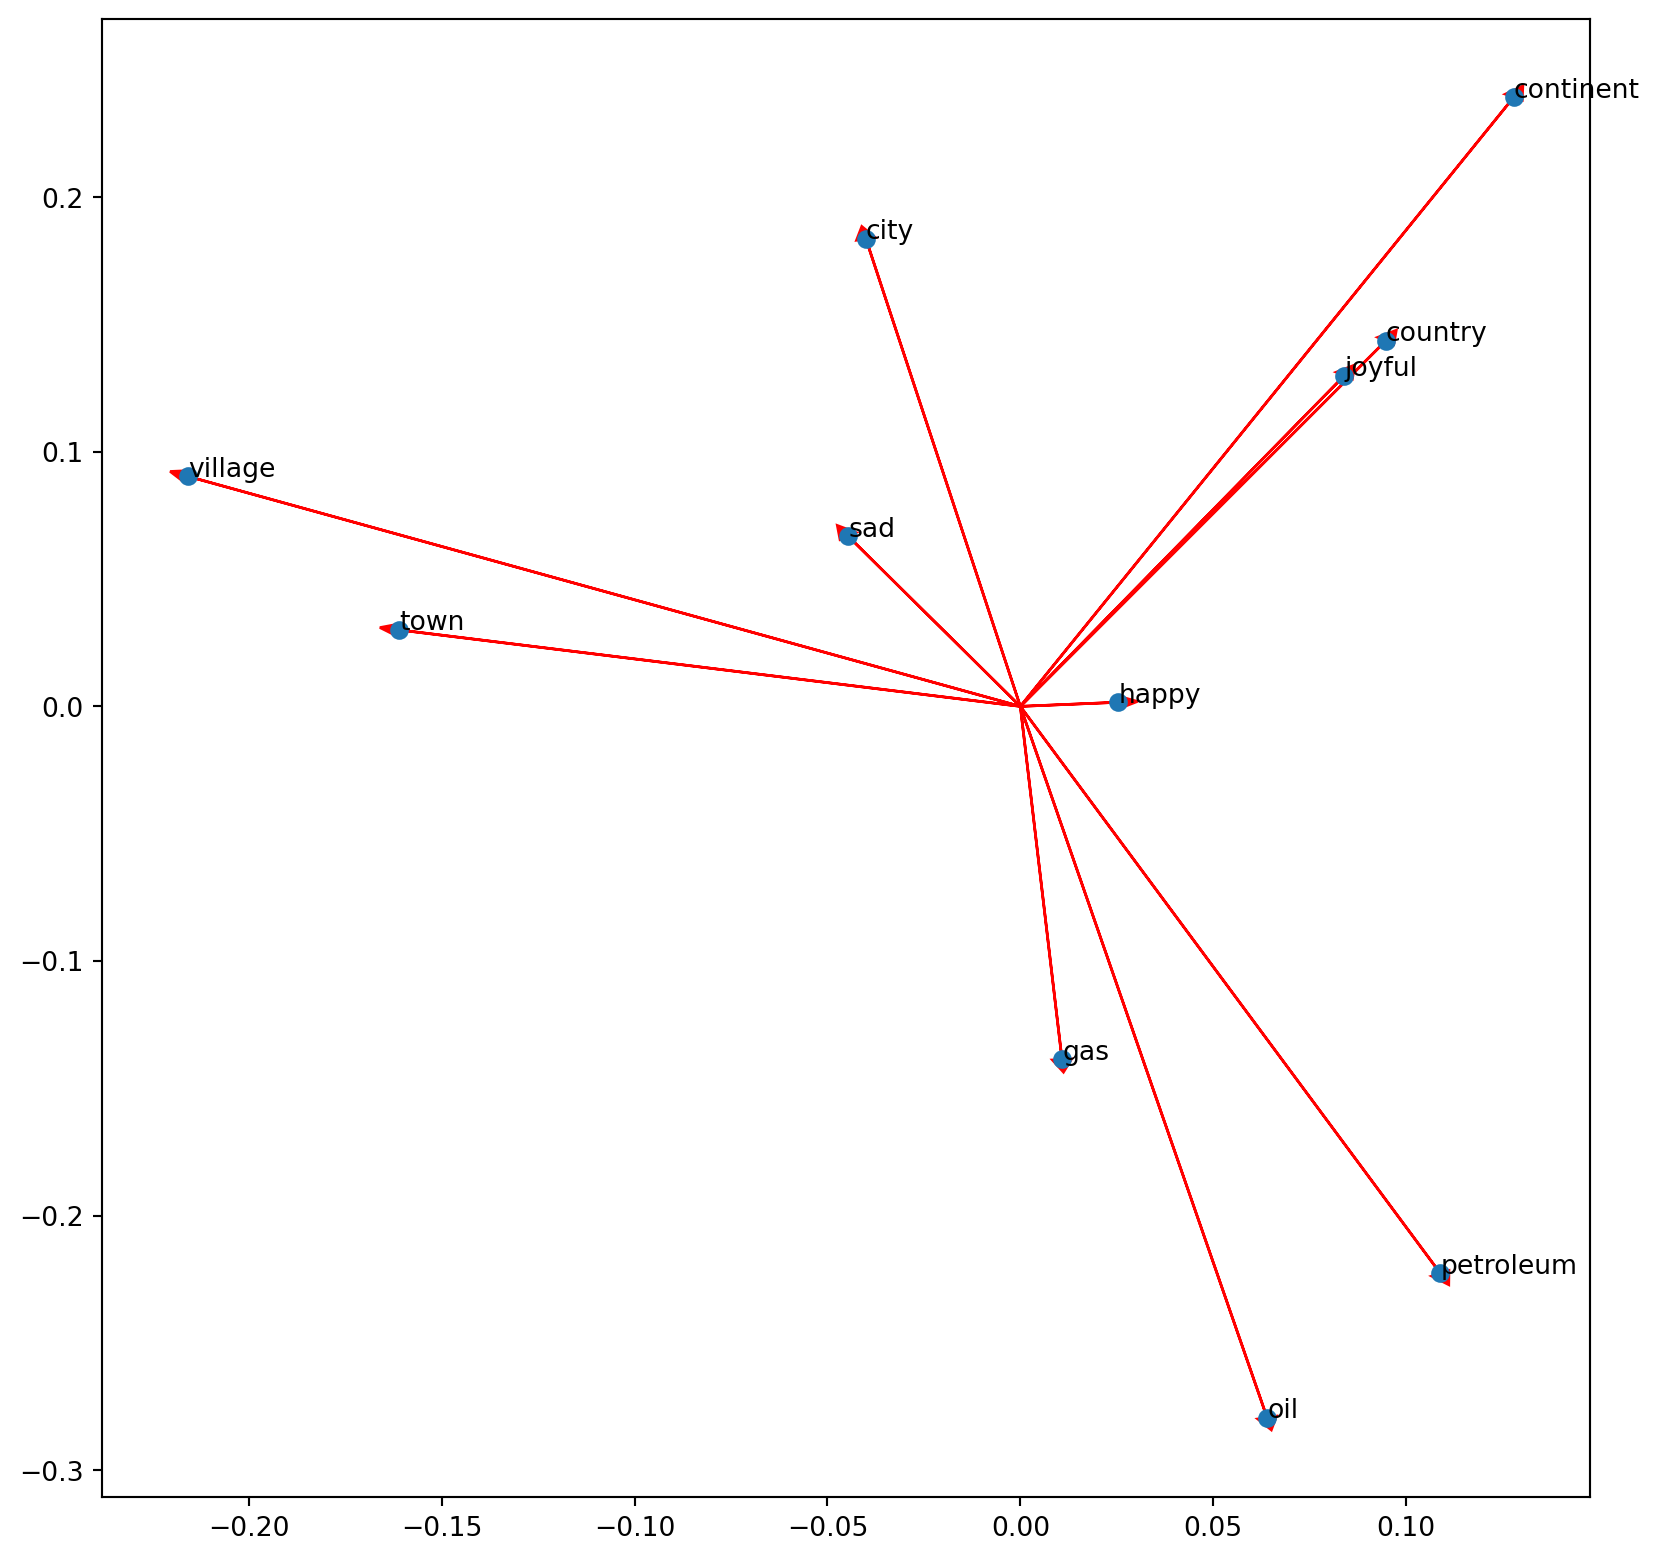

In [5]:
import matplotlib.pyplot as plt # Import matplotlib
%matplotlib inline

words = ['oil', 'gas', 'happy', 'sad', 'city', 'town', 'village', 'country', 'continent', 'petroleum', 'joyful']

bag2d = np.array([vec(word) for word in words]) # Convert each word to its vector representation

fig, ax = plt.subplots(figsize = (10, 10)) # Create custom size image

col1 = 3 # Select the column for the x axis
col2 = 2 # Select the column for the y axis

# Print an arrow for each word
for word in bag2d:
    ax.arrow(0, 0, word[col1], word[col2], head_width=0.005, head_length=0.005, fc='r', ec='r', width = 1e-5)

    
ax.scatter(bag2d[:, col1], bag2d[:, col2]); # Plot a dot for each word

# Add the word label over each dot in the scatter plot
for i in range(0, len(words)):
    ax.annotate(words[i], (bag2d[i, col1], bag2d[i, col2]))


plt.show()

Text(-0.044677734375, 0.06689453125, 'sad')

Text(0.025390625, 0.00160980224609375, 'happy')

Text(-0.1611328125, 0.030029296875, 'town')

Text(-0.2158203125, 0.09033203125, 'village')

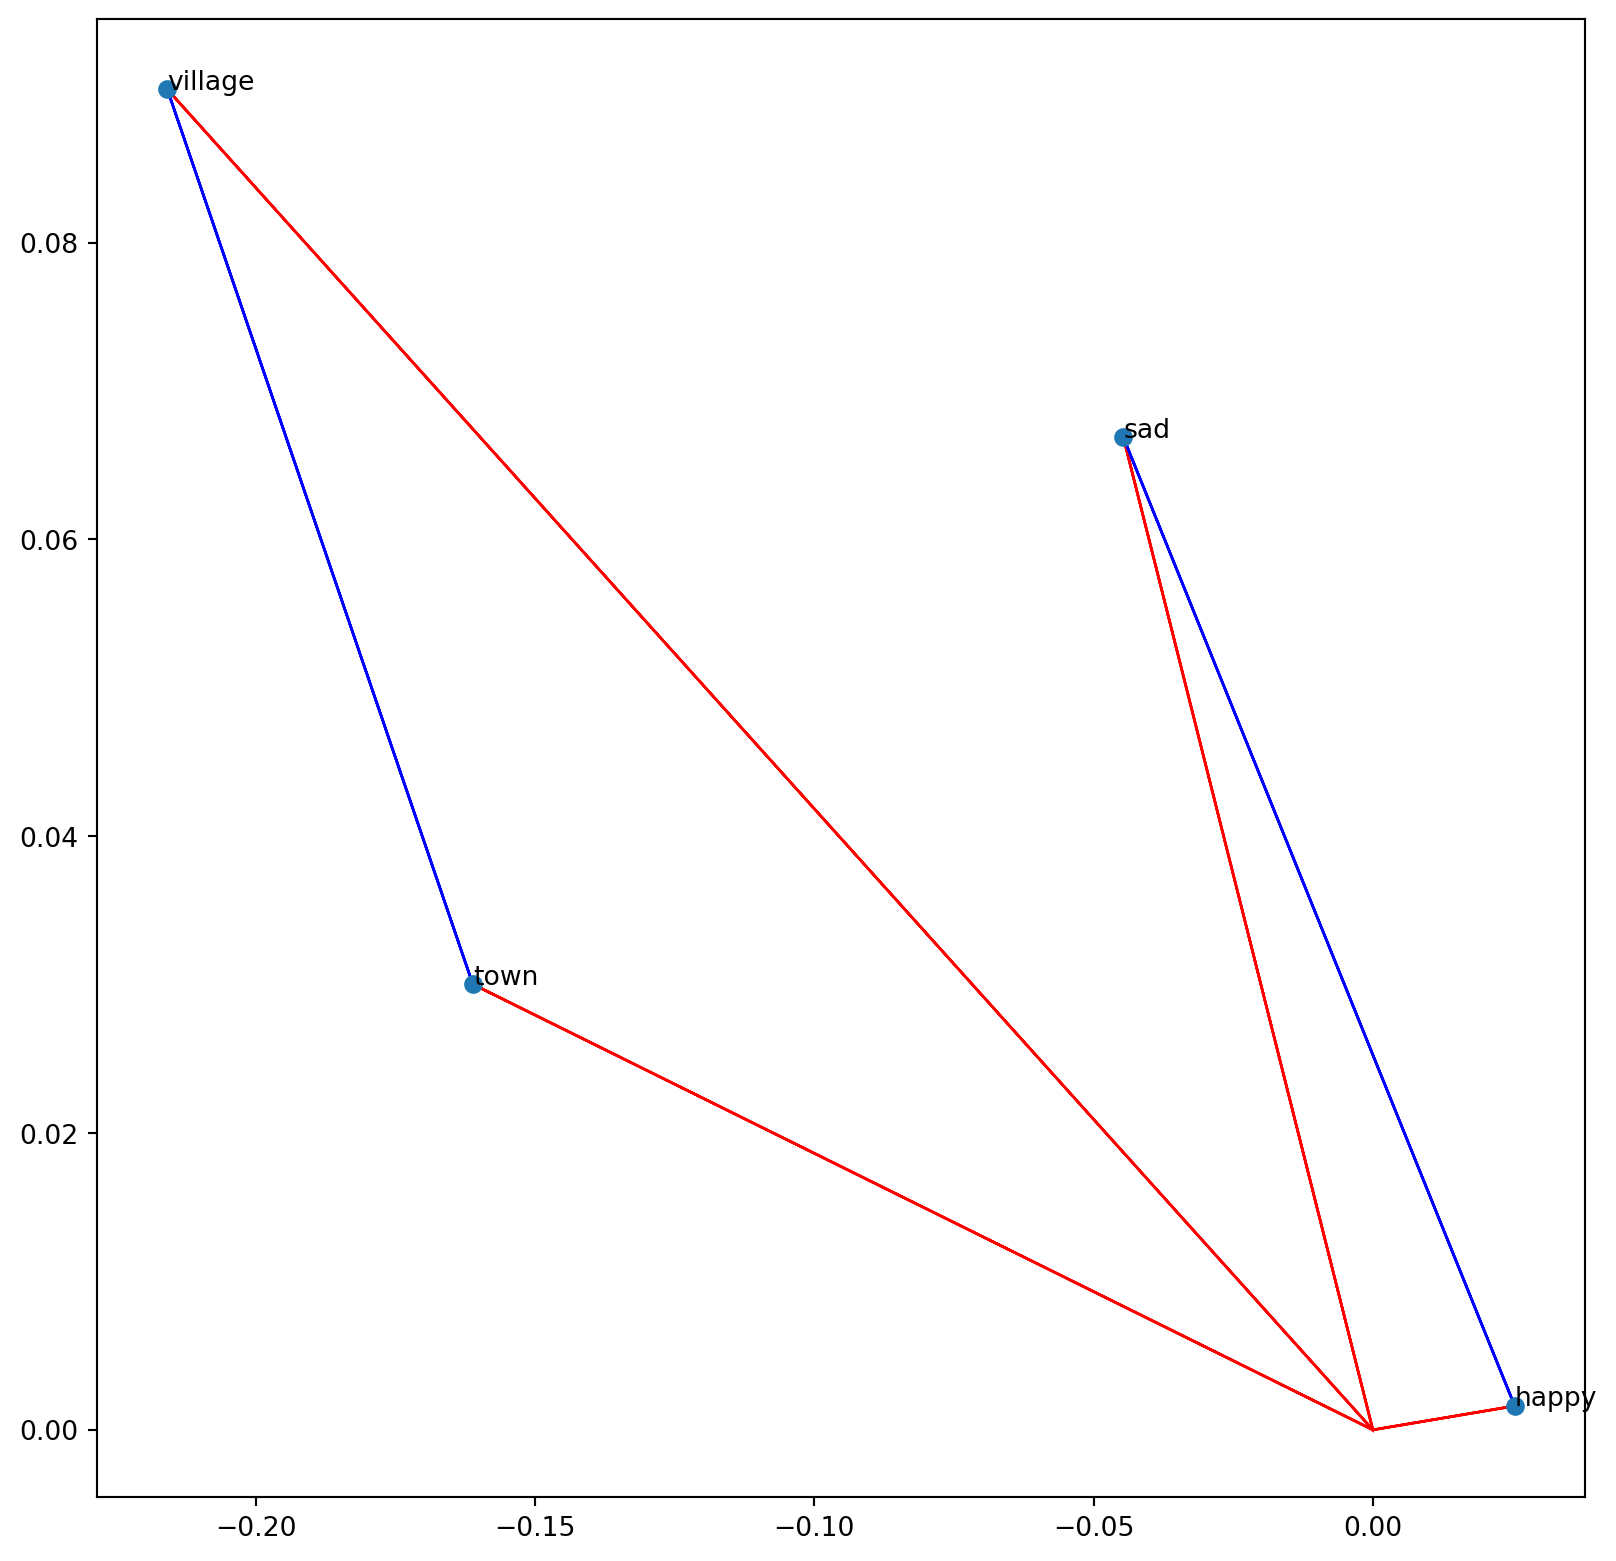

In [6]:
words = ['sad', 'happy', 'town', 'village']

bag2d = np.array([vec(word) for word in words]) # Convert each word to its vector representation

fig, ax = plt.subplots(figsize = (10, 10)) # Create custom size image

col1 = 3 # Select the column for the x axe
col2 = 2 # Select the column for the y axe

# Print an arrow for each word
for word in bag2d:
    ax.arrow(0, 0, word[col1], word[col2], head_width=0.0005, head_length=0.0005, fc='r', ec='r', width = 1e-5)
    
# print the vector difference between village and town
village = vec('village')
town = vec('town')
diff = town - village
ax.arrow(village[col1], village[col2], diff[col1], diff[col2], fc='b', ec='b', width = 1e-5)

# print the vector difference between village and town
sad = vec('sad')
happy = vec('happy')
diff = happy - sad
ax.arrow(sad[col1], sad[col2], diff[col1], diff[col2], fc='b', ec='b', width = 1e-5)


ax.scatter(bag2d[:, col1], bag2d[:, col2]); # Plot a dot for each word

# Add the word label over each dot in the scatter plot
for i in range(0, len(words)):
    ax.annotate(words[i], (bag2d[i, col1], bag2d[i, col2]))


plt.show()

In [7]:
print(np.linalg.norm(vec('town'))) # Print the norm of the word town
print(np.linalg.norm(vec('sad'))) # Print the norm of the word sad

2.3858097
2.9004838


In [8]:
capital = vec('France') - vec('Paris')
country = vec('Madrid') + capital

print(country[0:5]) # Print the first 5 values of the vector

[-0.02905273 -0.2475586   0.53952026  0.20581055 -0.14862823]


In [9]:
diff = country - vec('Spain')
print(diff[0:10])

[-0.06054688 -0.06494141  0.37643433  0.08129883 -0.13007355 -0.00952148
 -0.03417969 -0.00708008  0.09790039 -0.01867676]


In [10]:
# Create a dataframe out of the dictionary embedding. This facilitate the algebraic operations
keys = word_embeddings.keys()
data = []
for key in keys:
    data.append(word_embeddings[key])

embedding = pd.DataFrame(data=data, index=keys)
# Define a function to find the closest word to a vector:
def find_closest_word(v, k = 1):
    # Calculate the vector difference from each word to the input vector
    diff = embedding.values - v 
    # Get the norm of each difference vector. 
    # It means the squared euclidean distance from each word to the input vector
    delta = np.sum(diff * diff, axis=1)
    # Find the index of the minimun distance in the array
    i = np.argmin(delta)
    # Return the row name for this item
    return embedding.iloc[i].name

In [11]:
# Print some rows of the embedding as a Dataframe
embedding.head(10)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
country,-0.080078,0.133789,0.143555,0.094727,-0.047363,-0.023560,-0.008545,-0.186523,0.045898,-0.081543,...,-0.145508,0.067383,-0.244141,-0.077148,0.047607,-0.075195,-0.149414,-0.044189,0.097168,0.067383
city,-0.010071,0.057373,0.183594,-0.040039,-0.029785,-0.079102,0.071777,0.013306,-0.143555,0.011292,...,0.024292,-0.168945,-0.062988,0.117188,-0.020508,0.030273,-0.247070,-0.122559,0.076172,-0.234375
China,-0.073242,0.135742,0.108887,0.083008,-0.127930,-0.227539,0.151367,-0.045654,-0.065430,0.034424,...,0.140625,0.087402,0.152344,0.079590,0.006348,-0.037842,-0.183594,0.137695,0.093750,-0.079590
Iraq,0.191406,0.125000,-0.065430,0.060059,-0.285156,-0.102539,0.117188,-0.351562,-0.095215,0.200195,...,-0.100586,-0.077148,-0.123047,0.193359,-0.153320,0.089355,-0.173828,-0.054688,0.302734,0.105957
oil,-0.139648,0.062256,-0.279297,0.063965,0.044434,-0.154297,-0.184570,-0.498047,0.047363,0.110840,...,-0.195312,-0.345703,0.217773,-0.091797,0.051025,0.061279,0.194336,0.204102,0.235352,-0.051025
town,0.123535,0.159180,0.030029,-0.161133,0.015625,0.111816,0.039795,-0.196289,-0.039307,0.067871,...,-0.007935,-0.091797,-0.265625,0.029297,0.089844,-0.049805,-0.202148,-0.079590,0.068848,-0.164062
Canada,-0.136719,-0.154297,0.269531,0.273438,0.086914,-0.076172,-0.018677,0.006256,0.077637,-0.211914,...,0.105469,0.030762,-0.039307,0.183594,-0.117676,0.191406,0.074219,0.020996,0.285156,-0.257812
London,-0.267578,0.092773,-0.238281,0.115234,-0.006836,0.221680,-0.251953,-0.055420,0.020020,0.149414,...,-0.008667,-0.008484,-0.053223,0.197266,-0.296875,0.064453,0.091797,0.058350,0.022583,-0.101074
England,-0.198242,0.115234,0.062500,-0.058350,0.226562,0.045898,-0.062256,-0.202148,0.080566,0.021606,...,0.135742,0.109375,-0.121582,0.008545,-0.171875,0.086914,0.070312,0.003281,0.069336,0.056152
Australia,0.048828,-0.194336,-0.041504,0.084473,-0.114258,-0.208008,-0.164062,-0.269531,0.079102,0.275391,...,0.021118,0.171875,0.042236,0.221680,-0.239258,-0.106934,0.030884,0.006622,0.051270,-0.135742


In [12]:
find_closest_word(country)

'Spain'

In [13]:
find_closest_word(vec('Italy') - vec('Rome') + vec('Madrid'))

'Spain'

In [14]:
print(find_closest_word(vec('Berlin') + capital))
print(find_closest_word(vec('Beijing') + capital))

Germany
China


In [15]:
print(find_closest_word(vec('Lisbon') + capital))

Lisbon


In [16]:
doc = "Spain petroleum city king"
vdoc = [vec(x) for x in doc.split(" ")]
doc2vec = np.sum(vdoc, axis = 0)
doc2vec

array([ 2.87475586e-02,  1.03759766e-01,  1.32629395e-01,  3.33007812e-01,
       -2.61230469e-02, -5.95703125e-01, -1.25976562e-01, -1.01306152e+00,
       -2.18544006e-01,  6.60705566e-01, -2.58300781e-01, -2.09960938e-02,
       -7.71484375e-02, -3.07128906e-01, -5.94726562e-01,  2.00561523e-01,
       -1.04980469e-02, -1.10748291e-01,  4.82177734e-02,  6.38977051e-01,
        2.36083984e-01, -2.69775391e-01,  3.90625000e-02,  4.16503906e-01,
        2.83416748e-01, -7.25097656e-02, -3.12988281e-01,  1.05712891e-01,
        3.22265625e-02,  2.38403320e-01,  3.88183594e-01, -7.51953125e-02,
       -1.26281738e-01,  6.60644531e-01, -7.89794922e-01, -7.04345703e-02,
       -1.14379883e-01, -4.78515625e-02,  4.76318359e-01,  5.31127930e-01,
        8.10546875e-02, -1.17553711e-01,  1.02050781e+00,  5.59814453e-01,
       -1.17187500e-01,  1.21826172e-01, -5.51574707e-01,  1.44531250e-01,
       -7.66113281e-01,  5.36102295e-01, -2.80029297e-01,  3.85986328e-01,
       -2.39135742e-01, -

In [17]:
find_closest_word(doc2vec)

'petroleum'